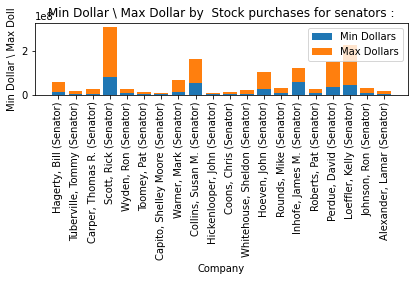

first_name- Tina
last_name- Smith
office- Smith, Tina (Senator)
ptr_link- https://efdsearch.senate.gov/search/view/ptr/c1e81cf0-c49f-444e-b387-c12f3b0170fd/
date_recieved- 04/20/2022
transactions- [{'transaction_date': '04/04/2022', 'owner': 'Spouse', 'ticker': '--', 'asset_description': 'Northern Lakes Capital IV, LP <div class="text-muted"> <em>Company:</em> Northern Lakes Capital IV, LP &nbsp;(Minneapolis, MN) </div> <div class="text-muted"><em>Description:</em>&nbsp;Private Equity</div>', 'asset_type': 'Other Securities', 'type': 'Purchase', 'amount': '$15,001 - $50,000', 'comment': '--', 'ptr_link': 'https://efdsearch.senate.gov/search/view/ptr/c1e81cf0-c49f-444e-b387-c12f3b0170fd/'}, {'transaction_date': '04/11/2021', 'owner': 'Spouse', 'ticker': '--', 'asset_description': 'Surgical Information Sciences <div class="text-muted"> <em>Company:</em> Surgical Information Sciences &nbsp;(Alpharetta, CA) </div> <div class="text-muted"><em>Description:</em>&nbsp;Health Management Systems

In [4]:

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt


def getStockData(website):
    data = requests.get(website)
    #datadict = json.load(data.text)
    i = data.text
    data = json.loads(data.text)
    return data

def getDollars(dollstr):
    if dollstr.find("-") == -1:
        if dollstr.find("Over") > -1:
            sdoll = dollstr[5:].replace("$","").replace(",","")
            sdoll = float(sdoll)
            ldoll = sdoll
            return ldoll, sdoll
        print(dollstr)
        return 0,0
    sdoll, ldoll = dollstr.split("-")

    sdoll = sdoll.replace("$", "").replace(",", "")
    ldoll = ldoll.replace("$", "").replace(",", "")
    sdoll = float(sdoll)
    ldoll = float(ldoll)
    return sdoll, ldoll

def getAsset(asset):
    index = asset.find("<")
    if index == -1:
        asset = asset
    else:
        asset = asset[:index]
    return asset

def processData(data):
    companyDict = {}
    infoDict = {"total":0,"sdoll":0.00,"ldoll":0.00}
    for d in data:
        key = d["office"]
        tdata = d["transactions"]
        for tran in tdata:
            try:
               tdate = tran["transaction_date"]
            except KeyError:
                continue
            asset = tran["asset_description"]
            asset = getAsset(asset)
            sdoll, ldoll = getDollars(tran["amount"])
            if key not in companyDict.keys():
                infoDict = {"total": 0, "sdoll": 0.00, "ldoll": 0.00}
                companyDict[key] = infoDict
            companyDict[key]["total"] += 1
            companyDict[key]["sdoll"] += sdoll
            companyDict[key]["ldoll"] += ldoll
    return companyDict

def prepareChatdata(cdict,clist,cnt):
    comp = []
    sdoll = []
    ldoll = []
    count = 0;
    for key,value in cdict.items():

        srch = (value["ldoll"],value["sdoll"],value["total"],key)
        index = clist.index(srch)
        if index <cnt:
            comp.append(key)
            sdoll.append(value["sdoll"])
            ldoll.append(value["ldoll"])


    plt.xticks(rotation="vertical")

    plt.xlabel("Company",rotation=0)
    plt.ylabel("Min Dollar \ Max Doll")
    plt.title("Min Dollar \ Max Dollar by  Stock purchases for senators :")
    souts = plt.bar(comp, sdoll)
    walks = plt.bar(comp, ldoll, bottom=sdoll)
    plt.legend((souts[0], walks[0]), ("Min Dollars", "Max Dollars"), loc=0)
    plt.tight_layout()
    plt.show()

def topCharts(cdata):
    clist = []
    for key,value in cdata.items():
        clist.append((value["ldoll"],value["sdoll"],value["total"],key))
    clist.sort(reverse=True)
    return clist

#(data)
def printData(data):
    x=data[0]
    for key, value in data[0].items():
        print(f"{key}- {value}")
        if key == "transactions":
            for t in value:
              for key1, value1 in t.items():
                print(f"    {key1}- {value1}")
    x = 0
def main():
    website = "https://senate-stock-watcher-data.s3-us-west-2.amazonaws.com/aggregate/all_transactions_for_senators.json"
    stockData = getStockData(website)
    companyDict = processData(stockData)
    clist = topCharts(companyDict)
    prepareChatdata(companyDict,clist,20)
    i = 0

    printData(stockData)
    print (clist)
main()